<a href="https://colab.research.google.com/github/kk-shetty/data_science_ik/blob/main/projects/ml_mini_project/node_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Understanding Networks through Clustering - Leveraging Local Node Features for Structural Profiling

#### 1. Loading data set into the notebook and converting into graph representation.

In [2]:
# Using networkx library to read edge file
import networkx as nx

In [7]:
# Loading data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
file_path = '/content/drive/My Drive/ml_mini_project_data/soc-karate.txt'

In [9]:
# Read the edge file into a graph using NetworkX
G = nx.read_edgelist(file_path)

In [10]:
# Display basic information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 34
Number of edges: 78


#### 2. Feature Engineering
##### - Deriving informative features from the local properties of graph nodes involves extracting relevant information that characterizes each node and its local neighborhood.

In [14]:
# Function to extract ego network features for a node
def extract_ego_network_features(graph, node):
    ego_net = nx.ego_graph(graph, node)
    features = {}
    # Calculate ego network properties
    features['ego_nodes'] = len(ego_net.nodes())
    features['ego_edges'] = len(ego_net.edges())
    features['ego_density'] = nx.density(ego_net)
    # Add more features as needed
    return features

In [15]:
# Extract ego network features for each node in the graph
ego_network_features = {}
for node in G.nodes():
    ego_network_features[node] = extract_ego_network_features(G, node)

In [16]:
print(ego_network_features)

{'2': {'ego_nodes': 10, 'ego_edges': 21, 'ego_density': 0.4666666666666667}, '1': {'ego_nodes': 17, 'ego_edges': 34, 'ego_density': 0.25}, '3': {'ego_nodes': 11, 'ego_edges': 21, 'ego_density': 0.38181818181818183}, '4': {'ego_nodes': 7, 'ego_edges': 16, 'ego_density': 0.7619047619047619}, '5': {'ego_nodes': 4, 'ego_edges': 5, 'ego_density': 0.8333333333333334}, '6': {'ego_nodes': 5, 'ego_edges': 7, 'ego_density': 0.7}, '7': {'ego_nodes': 5, 'ego_edges': 7, 'ego_density': 0.7}, '8': {'ego_nodes': 5, 'ego_edges': 10, 'ego_density': 1.0}, '9': {'ego_nodes': 6, 'ego_edges': 10, 'ego_density': 0.6666666666666666}, '11': {'ego_nodes': 4, 'ego_edges': 5, 'ego_density': 0.8333333333333334}, '12': {'ego_nodes': 2, 'ego_edges': 1, 'ego_density': 1.0}, '13': {'ego_nodes': 3, 'ego_edges': 3, 'ego_density': 1.0}, '14': {'ego_nodes': 6, 'ego_edges': 11, 'ego_density': 0.7333333333333333}, '18': {'ego_nodes': 3, 'ego_edges': 3, 'ego_density': 1.0}, '20': {'ego_nodes': 4, 'ego_edges': 4, 'ego_density

In [ ]:
# Function to calculate the ego network
def calculate_ego_network(graph, node, radius):
    ego_net = nx.ego_graph(graph, node, radius=radius)
    extended_ego_net = ego_net.copy()
    for ego_node in ego_net.nodes():
        neighbors =


************************** TESTING *****************************

In [17]:
file_path_2 = '/content/drive/My Drive/ml_mini_project_data/sample_network.txt'
G2 = nx.read_edgelist(file_path_2)
print("Number of nodes:", G2.number_of_nodes())
print("Number of edges:", G2.number_of_edges())

Number of nodes: 21
Number of edges: 31


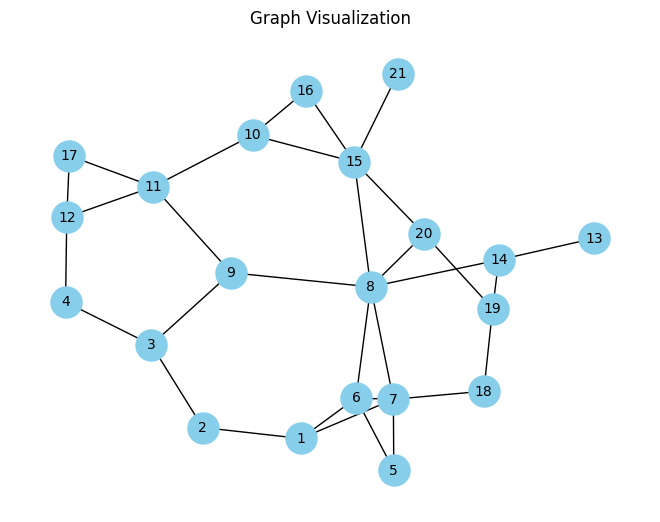

In [31]:
import matplotlib.pyplot as plt

# Draw the graph with customizations
pos = nx.spring_layout(G2)  # Layout algorithm
nx.draw(G2, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
plt.title("Graph Visualization")
plt.show()


In [32]:
ego_network_features_g2 = {}
for node in G2.nodes():
    ego_network_features_g2[node] = extract_ego_network_features(G2, node)

In [41]:
print(f"Node:\tENodes\tEEdges\tEDensity")
for node, properties in ego_network_features_g2.items():
    print(f"{node}:\t{properties['ego_nodes']}\t{properties['ego_edges']}\t{properties['ego_density']}")

Node:	ENodes	EEdges	EDensity
1:	4	4	0.6666666666666666
2:	3	2	0.6666666666666666
6:	5	7	0.7
7:	6	8	0.5333333333333333
3:	4	3	0.5
4:	3	2	0.6666666666666666
9:	4	3	0.5
12:	4	4	0.6666666666666666
5:	3	3	1.0
8:	7	8	0.38095238095238093
18:	3	2	0.6666666666666666
14:	4	3	0.5
15:	6	7	0.4666666666666667
20:	4	4	0.6666666666666666
11:	5	5	0.5
10:	4	4	0.6666666666666666
16:	3	3	1.0
17:	3	3	1.0
13:	2	1	1.0
19:	4	3	0.5
21:	2	1	1.0
